# **Import Libraries and modules**

- What: Installing keras via pip package manager, Keras is a wrapper over Tensorflow. Then we import it for use
- Why: This package will help us define our DNN layer by layer

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

- What: So It gets the mnist data partitioned into Train-Test set
- Why: Train-test split will be used to train and then test the model on test set

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


- What:
  - We explore our data a little. 
  - We print number of training and test examples
  - We also show a example to see what our data looks like
  - `%matplotlib inline` commands makes the plots appear within our notebook
  
- Why
  - Knowing train and test size and data dimensions will help us design/debug our ConvNet
  
**Note** 
- the image looks color but it isn't, its just the way `plt.imshow` gives color to different cell values in a 2D matrix
- See that we have a single channel in the initial image, its a grayscale not RGB image.

(60000, 28, 28)


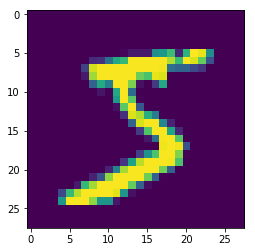

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

What: We reshape to get single channel as dimension, the last 1 in each reshape is for the channel. Since the image is single channel so this is done. 

If image was 3 channel then

```python
X_train = X_train.reshape(X_train.shape[0], 28, 28,3)
```

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

- Normalize data by dividing by 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

What
- We do one hot encoding of the target labels for using categorical cross entropy loss.

Why
- Cross entropy loss function for multi-class problems requires your target labels to be one hot encoded.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Experiments

We will use `model.count_params()` instead of `model.summary()` to save some space and make this notebook compact.

format
 - changes
 - reason/intuition

In [0]:
# Just turning off warnings to make notebook concise, don't do this initially
import warnings
warnings.filterwarnings("ignore")

## Dropout and MaxPool at end
- Use **dropouts** with more epochs to prevent overfit
- Use **MaxPool** at the end to reduce params
- Print Both Train and test score to check overfit.
- Put dropout earlier in network and usually after 32 kernel layers since they will make the next layer params explode, so dropout there will be most effective in reducing overfit with info loss
- Increasing Epochs and batch size helped. Standardized Batch size at 2048

**Note**: I have only listed combinations which went above 99%, I tried many more combinations which did not work well. Also I decided not to use LR tuning / BatchNorm etc since I wanted to see what can be achieved by just dropout and maxpools.


### 1st Layer 32 Kernels

**Some Observation about 1st layer of Conv Net**

- First layer with high number of kernels doesn't give too many params, this is because it does not have too many incoming channels, has only 1 grayscale channel. As a result we start the 1st layer below with 32 kernels

In [73]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(keras.layers.Dropout(0.2))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(32, 3,3, activation='relu')) # 10
model.add(keras.layers.Dropout(0.2))
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(MaxPooling2D(pool_size=(2, 2))) #4



model.add(Convolution2D(32, 3,3, activation='relu')) # 2
model.add(keras.layers.Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1))


model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=2048, epochs=90, verbose=0)
score = model.evaluate(X_train, Y_train, verbose=0)
print("Train Score = ",score)

score = model.evaluate(X_test, Y_test, verbose=0)
print("Score = ",score)


Params =  17402
Train Score =  [0.012744362086317657, 0.9967833333333334]
Score =  [0.018983806559955702, 0.9944]


### 1st Layer of 64

In [63]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(keras.layers.Dropout(0.1))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(32, 3,3, activation='relu')) # 10
model.add(keras.layers.Dropout(0.2))
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(MaxPooling2D(pool_size=(2, 2))) #4



model.add(Convolution2D(32, 3,3, activation='relu')) # 2
model.add(keras.layers.Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1))


model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=2048, epochs=80, verbose=0)
score = model.evaluate(X_train, Y_train, verbose=0)
print("Train Score = ",score)

score = model.evaluate(X_test, Y_test, verbose=0)
print("Score = ",score)


Params =  18234
Train Score =  [0.012216970350620492, 0.9965]
Score =  [0.02435745602978277, 0.9938]


### Minor change, from above , increase dropout = 0.2 overall

In [67]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(keras.layers.Dropout(0.2))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(32, 3,3, activation='relu')) # 10
model.add(keras.layers.Dropout(0.2))
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(MaxPooling2D(pool_size=(2, 2))) #4



model.add(Convolution2D(32, 3,3, activation='relu')) # 2
model.add(keras.layers.Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1))


model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=2048, epochs=90, verbose=0)
score = model.evaluate(X_train, Y_train, verbose=0)
print("Train Score = ",score)

score = model.evaluate(X_test, Y_test, verbose=0)
print("Score = ",score)


Params =  18234
Train Score =  [0.008388370233329867, 0.99795]
Score =  [0.016755277727439535, 0.9947]


### Reduce Params to 14k (Winner!! 99.41%, 14,922 params)

- Putting MaxPool at end. 
- Basically if a number is detected at any point in image and one of 4 pixels in 10,1 layer is activated then maxpool will find it.

In [66]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(16, 1, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(32, 3,3, activation='relu')) # 10
model.add(keras.layers.Dropout(0.2))
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(MaxPooling2D(pool_size=(2, 2))) #4



model.add(Convolution2D(16, 3,3, activation='relu')) # 2
model.add(keras.layers.Dropout(0.1))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=2048, epochs=120, verbose=0)
score = model.evaluate(X_train, Y_train, verbose=0)
print("Train Score = ",score)

score = model.evaluate(X_test, Y_test, verbose=0)
print("Score = ",score)


Params =  14922
Train Score =  [0.010634894402059338, 0.9971833333333333]
Score =  [0.019736302957570298, 0.9941]


### 18k Params, standard 16-32, 5x5 receptive field per Maxpool
- Idea that increasing complexity with more dropouts may help.

In [68]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Convolution2D(32, 3,3, activation='relu')) # 24
model.add(keras.layers.Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(16, 3,3, activation='relu')) # 10
model.add(keras.layers.Dropout(0.1))
model.add(Convolution2D(32, 3,3, activation='relu')) # 8
model.add(keras.layers.Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2))) #4


model.add(Convolution2D(16, 3,3, activation='relu')) # 2
model.add(Convolution2D(10, 1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Activation('softmax'))

print("Params = ",model.count_params())

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=2048, epochs=120, verbose=0)
score = model.evaluate(X_train, Y_train, verbose=0)
print("Train Score = ",score)

score = model.evaluate(X_test, Y_test, verbose=0)
print("Score = ",score)



Params =  18858
Train Score =  [0.0223863034799695, 0.9966333333333334]
Score =  [0.030120347533747555, 0.9931]


## Trying Bigger size MaxPool (Winner!! 99.48%, 19,722 params)
```
model.add(MaxPooling2D(pool_size=(4, 4)))
```

- A maxpool preceeded by 32 kernel layer may have enough info

In [14]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(16, 3,3, activation='relu')) # 10
model.add(Convolution2D(32, 3,3, activation='relu')) # 8
model.add(keras.layers.Dropout(0.2))
model.add(Convolution2D(16, 1, activation='relu'))


model.add(Convolution2D(16, 3,3, activation='relu')) # 6
model.add(keras.layers.Dropout(0.1))
model.add(Convolution2D(32, 3,3, activation='relu')) # 4
model.add(MaxPooling2D(pool_size=(4, 4))) # 1
model.add(Convolution2D(10, 1))


model.add(Flatten())
model.add(Activation('softmax'))

print("Params = ",model.count_params())

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=2048, epochs=90, verbose=0)
score = model.evaluate(X_train, Y_train, verbose=0)
print("Train Score = ",score)

score = model.evaluate(X_test, Y_test, verbose=0)
print("Score = ",score)

Params =  19722
Train Score =  [0.00957389279246369, 0.9972833333333333]
Score =  [0.017384651358673, 0.9948]


In [72]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(keras.layers.Dropout(0.2))
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(16, 3,3, activation='relu')) # 10
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(keras.layers.Dropout(0.1))
model.add(Convolution2D(16, 1, activation='relu'))


model.add(Convolution2D(16, 3,3, activation='relu')) # 6
model.add(keras.layers.Dropout(0.1))
model.add(Convolution2D(32, 3,3, activation='relu')) # 4
model.add(keras.layers.Dropout(0.2))
model.add(MaxPooling2D(pool_size=(4, 4))) # 1
model.add(Convolution2D(10, 1))


model.add(Flatten())
model.add(Activation('softmax'))

print("Params = ",model.count_params())

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=2048, epochs=120, verbose=0)
score = model.evaluate(X_train, Y_train, verbose=0)
print("Train Score = ",score)

score = model.evaluate(X_test, Y_test, verbose=0)
print("Score = ",score)

Params =  17146
Train Score =  [0.011023450508624471, 0.9975666666666667]
Score =  [0.021538454151176847, 0.9938]


## Using Only mostly 16 Kernels per layer

- Start with 64 since initial layer doesn't add much

In [69]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(MaxPooling2D(pool_size=(2, 2))) # 13
model.add(keras.layers.Dropout(0.2))
model.add(Convolution2D(16, 3,3, activation='relu')) # 11
model.add(keras.layers.Dropout(0.2))
model.add(Convolution2D(16, 3,3, activation='relu')) # 9
model.add(MaxPooling2D(pool_size=(2, 2))) # 4
model.add(Convolution2D(32, 3,3, activation='relu')) # 2
model.add(keras.layers.Dropout(0.2))
model.add(Convolution2D(16, 2,2, activation='relu'))
model.add(Convolution2D(10, 1)) # 1


model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=2048, epochs=125, verbose=0)

score = model.evaluate(X_train, Y_train, verbose=0)
print("Train Score = ",score)

score = model.evaluate(X_test, Y_test, verbose=0)
print("Score = ",score)
# 9922

Params =  14138
Train Score =  [0.011234934665727754, 0.99645]
Score =  [0.02221203788055136, 0.9926]


# Main Observations for High Performance
- Give initial 1st kernel high number helps and keeps params down. I think since the 1st kernel is the only kernel which interacts with the main image, high number in it is needed to extract various image lines, gradients, angles.

- Give 2nd last kernel (before 10,1 layer) 32 kernels or more gives good performance. This helps the last layer to have enough info to find an answer. only 16 in 2nd last doesn't give last layer to do much.

- High number of Epochs

- Maxpool in weird ways like 4x4 was a winner. I guess this maxPool also helped in reducing params and regularization
- Watch the train and test score to check overfitting and then adjust dropout.

# Initial Network in Assignment

In [44]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

print("Params = ",model.count_params())

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=2048, epochs=10, verbose=0)

score = model.evaluate(X_train, Y_train, verbose=0)
print("Train Score = ",score)

score = model.evaluate(X_test, Y_test, verbose=0)
print("Score = ",score)

Params =  68260
Train Score =  [0.11353598490183552, 0.9688833333333333]
Score =  [0.12300231868512929, 0.9649]


# Layer Wise Feature Map visualization

In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_409 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_127 (Dropout)        (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_410 (Conv2D)          (None, 26, 26, 16)        528       
_________________________________________________________________
conv2d_411 (Conv2D)          (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_155 (MaxPoolin (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_412 (Conv2D)          (None, 10, 10, 32)        4640      
_________________________________________________________________
dropout_128 (Dropout)        (None, 10, 10, 32)        0         
__________

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

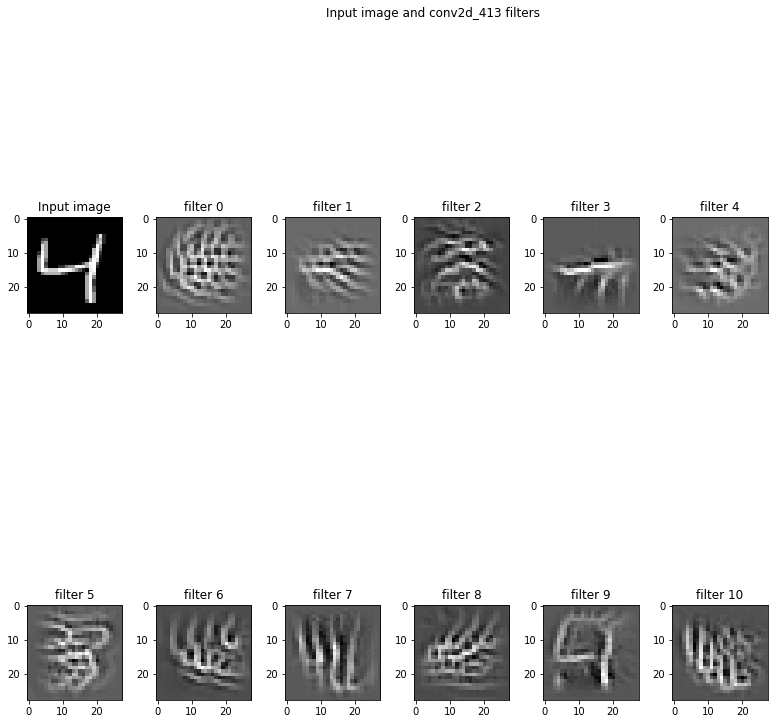

In [79]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_413'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

# Stuff searched from Online resources
- Use a different LR and 
- with validation for EarlyStopping
- LR history of epochs


Params =  18138
Train Score =  [0.0333668100619417, 0.98955]
Score =  [0.03863695058677113, 0.9863]


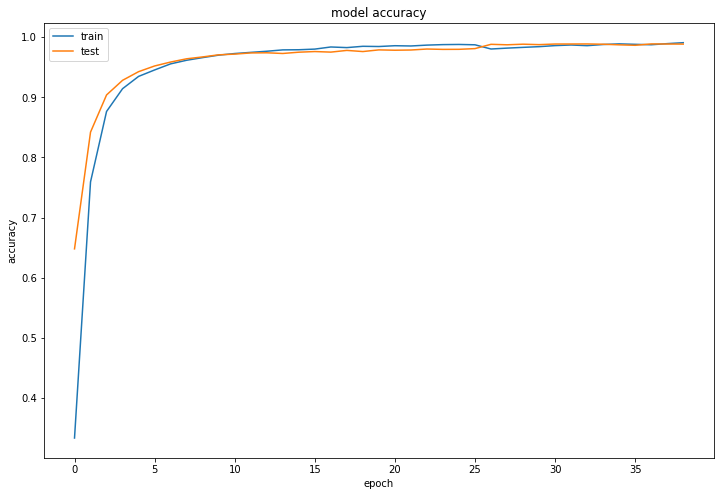

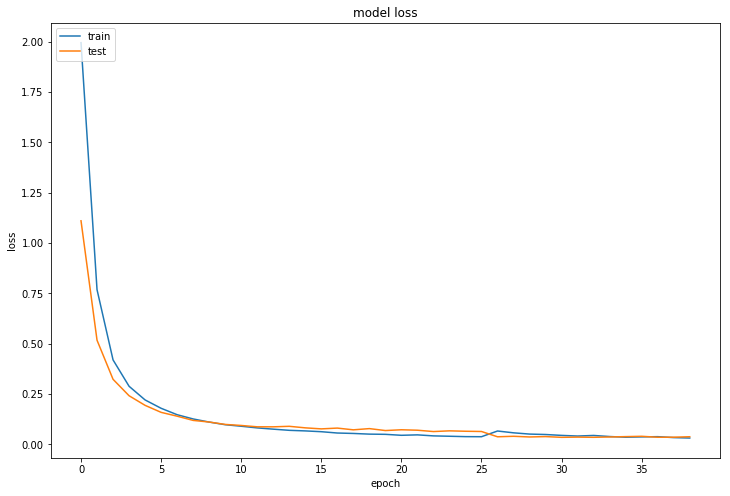

In [87]:
from keras.layers import Activation
from keras import optimizers
from keras.callbacks import EarlyStopping
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(keras.layers.Dropout(0.2))
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(16, 3,3, activation='relu')) # 10
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(MaxPooling2D(pool_size=(2, 2))) #4

model.add(Convolution2D(32, 4,4, activation='relu')) # 1
model.add(Convolution2D(10, 1))


model.add(Flatten())
model.add(Activation('softmax'))

adam = optimizers.Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])
print("Params = ",model.count_params())

validation_split = 0.5
validation_size=int(X_train.shape[0]*validation_split)
train_size = X_train.shape[0] - validation_size
es = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=3, verbose=0)
es2 = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=8, verbose=0)
hist_1 = model.fit(X_train[:train_size], Y_train[:train_size],
                epochs=60,
                batch_size=2048,
                shuffle=True,
                validation_data=(X_train[train_size:], Y_train[train_size:]),
                verbose=0,
                callbacks=[es])
hist_2 = model.fit(X_train[train_size:], Y_train[train_size:],
                epochs=60,
                batch_size=2048,
                shuffle=True,
                validation_data=(X_train[:train_size], Y_train[:train_size]),
                verbose=0,
                callbacks=[es2])

history = {}

for key in hist_1.history.keys():
  history[key] = list(hist_1.history[key])
  history[key].extend(hist_2.history[key])
  



score = model.evaluate(X_train, Y_train, verbose=0)
print("Train Score = ",score)

score = model.evaluate(X_test, Y_test, verbose=0)
print("Score = ",score)

plt.figure(figsize=(12,8))
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
